# Промежуточная аттестация
Рассчитайте следующие показатели:\
? Из каких регионов больше всего заявок\
? Какой средний процент отказов (Bounce)\
? С каких устройств чаще заходят на сайты\
? Какие источники наиболее конвертируемые\
? Рассчитайте ROMI (при расчете придумайте методологию расчета средней стоимость
проданного автомобиля)\
? Посчитайте выручку в рублях только по долларовым позициям\
? Определите, какой источник трафика наиболее выгоден для компании по текущим данным\
? Ответьте на вопрос: каких показателей не хватает, чтобы посчитать чистую прибыль?\
? Сделать прогноз до конца февраля по количеству конверсий на каждый день\
? Какая будет выручка за первый квартал, если средняя стоимость авто останется
неизменной, а продажи будут пропорциональны текущим данным?


In [ ]:
from google.colab import drive #Подключение Google Drive
drive.mount('/content/drive')

In [ ]:
!pip install openpyxl #Установка и импорт библиотек
import pandas as pd

#### Подключение файла и разбиение на датасеты

In [107]:
file_path = '/content/drive/MyDrive/Копия Премиум авто(Кор.дата).xlsx'

guide = pd.read_excel(file_path,sheet_name='Справочник', engine='openpyxl')

marketing = pd.read_excel(file_path,sheet_name='Маркетинговые данные', engine='openpyxl')

crm = pd.read_excel(file_path,sheet_name='Данные из CRM', engine='openpyxl')

In [113]:
print(marketing.columns)

Index(['Client ID', 'Domain', 'City', 'Region', 'Browser', 'Device Category',
       'Date', 'Medium', 'Source', 'Avg. Session Duration', 'Bounce Rate',
       'Sessions', 'Goal Completion Location', 'Goal Completions',
       'Goal Conversion Rate', 'Goal Value', 'Конверсия', 'Source conv.'],
      dtype='object')


#### Вывод первых 5 строк, для проверки корректности загрузки данных

In [132]:
print(guide.head())

      Марка  Модель          Цена      Валюта  Маржинальность
0  Mercedes     gls  1.135135e+05  Доллар США            0.33
1  Mercedes  GT_AMG  1.743243e+05  Доллар США            0.34
2       BMW      x5  7.222222e+04        Евро            0.27
3       BMW      i3  5.166667e+04        Евро            0.35
4  Mercedes    с180  2.300000e+06       Рубль            0.20


In [88]:
print(marketing.head())

                     Client ID                   Domain    City  Region  \
0  GA1.2.1029165320.1581675414       BMW-keyauto-krd.ru  Zurich  Zurich   
1  GA1.2.1029165320.1581675414  cars.BMW-keyauto-krd.ru  Zurich  Zurich   
2  GA1.2.1029165320.1581675414       BMW-keyauto-krd.ru  Zurich  Zurich   
3   GA1.2.360702973.1573932024       BMW-keyauto-krd.ru  Zurich  Zurich   
4  GA1.2.1394084210.1579796276    Mersedes-krasnodar.ru  Zurich  Zurich   

     Browser Device Category       Date    Medium                   Source  \
0     Chrome          mobile 2020-02-14  referral  cars.BMW-keyauto-krd.ru   
1     Chrome          mobile 2020-02-14  referral       BMW-keyauto-krd.ru   
2     Chrome          mobile 2020-02-14  referral  cars.BMW-keyauto-krd.ru   
3  YaBrowser          mobile 2020-01-28  referral                yandex.ru   
4     Chrome          mobile 2020-01-27   organic                   google   

  Avg. Session Duration Bounce Rate  Sessions  \
0              0.002292        

In [60]:
print(crm.head())

                     Client ID      Город Просчет стоимости модели  \
0  GA1.2.1108606219.1572272784  Krasnodar                      NaN   
1   GA1.2.125017234.1571028033  Krasnodar                        0   
2  GA1.2.1823974094.1570697747  Krasnodar                        -   
3  GA1.2.1823974094.1570697747  Krasnodar                        0   
4   GA1.2.554197778.1572516039  Krasnodar                      NaN   

  Приход к диллеру Продажа  
0                0     NaN  
1                1     NaN  
2                -       -  
3                1     NaN  
4                0     NaN  


## *? Из каких регионов больше всего заявок*

In [ ]:
# Подсчет количества заявок по регионам
region_counts = marketing['Region'].value_counts()

# Вывод топ регионов по количеству заявок
print(region_counts.head(10))

###### Топ-10 регионов по заявкам
Krasnodar Krai     47648\
Stavropol Krai      3246\
Rostov Oblast       2388\
Moscow              2116\
Crimea              1363\
Voronezh Oblast     1123\
Adygea               868\
Chechnya             637\
Moscow Oblast        583\
(not set)            564

## *? Какой средний процент отказов (Bounce)*


In [ ]:
import numpy as np

# Замена некорректных значений на NaN и конвертация колонки в числовой формат
marketing['Bounce Rate'] = pd.to_numeric(marketing['Bounce Rate'], errors='coerce')

# Расчет среднего процента отказов с учетом очищенных данных
average_bounce_rate = marketing['Bounce Rate'].mean() * 100  # Преобразование в проценты

print(average_bounce_rate)


###### Средний процент отказов *0.22858014801251242%*

##*? С каких устройств чаще заходят на сайты*

In [ ]:
# Подсчет количества сессий по категориям устройств
device_usage = marketing['Device Category'].value_counts()

print(device_usage)

###### С мобильных устройств заходят чаще всего
Device Category\
mobile     39465\
desktop    24630\
tablet      2067

## *? Какие источники наиболее конвертируемые*

In [ ]:
# Замена некорректных значений на NaN и конвертация колонок в числовой формат
marketing['Goal Completions'] = pd.to_numeric(marketing['Goal Completions'], errors='coerce')
marketing['Sessions'] = pd.to_numeric(marketing['Sessions'], errors='coerce')

# Группировка по источнику и подсчет сумм конверсий и сессий
conversion_data = marketing.groupby('Source').agg({
    'Goal Completions': 'sum',
    'Sessions': 'sum'
}).reset_index()

# Расчет конверсионной ставки
conversion_data['Conversion Rate'] = (conversion_data['Goal Completions'] / conversion_data['Sessions']) * 100

# Сортировка по конверсионной ставке для определения наиболее конвертируемых источников
conversion_data = conversion_data.sort_values(by='Conversion Rate', ascending=False)

# Вывод топ источников по конверсионной ставке
conversion_data.head(10)


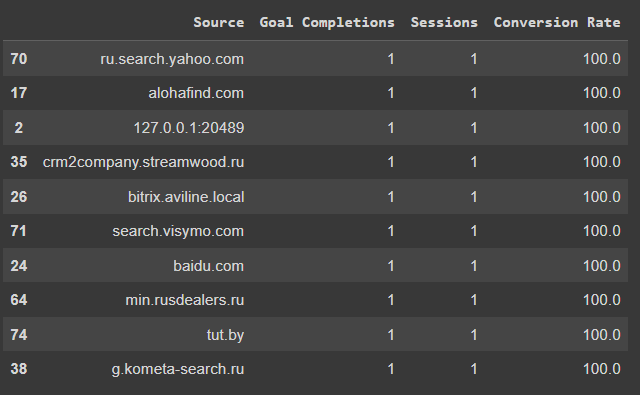

## *? Рассчитайте ROMI (при расчете придумайте методологию расчета средней стоимость проданного автомобиля)*

###### Методолгоия расчета средней стоимости проданного авто
**Извлечение данных о марке и модели**:  Из колонок Domain и Goal Completion
Location маркетинговых данных извлекаем информацию о марках и моделях
автомобилей. Для этого применяем регулярные выражения и обработку строк, чтобы корректно выделить названия марок и моделей.

**Сопоставление с ценами из справочника**: С помощью метода объединения (merge) сопоставляем извлеченные данные о марках и моделях с соответствующими записями в справочнике, который содержит информацию о стоимости каждой марки и модели в разных валютах.

**Конвертация валют и расчет средней стоимости**: Преобразуем цены всех автомобилей к единой валюте (рубли). Затем рассчитаем среднюю стоимость автомобилей, учитывая полученные цены из справочника.

In [ ]:
import re

# Функция для извлечения марки из домена
def extract_brand(domain):
    # Поиск возможных марок в домене
    possible_brands = ['bmw', 'mersedes']
    domain_parts = re.split(r'\.|-', domain.lower())  # Разделение домена на части по точке и дефису
    for part in domain_parts:
        if part in possible_brands:
            return part.capitalize()  # Возврат марки с заглавной буквы

# Функция для извлечения модели из Goal Completion Location
def extract_model(location):
    match = re.search(r'/models/([\w]+)/', location)
    if match:
        return match.group(1)

# Применение функций и добавление результатов в новые столбцы
marketing['Extracted Brand'] = marketing['Domain'].apply(extract_brand)
marketing['Extracted Model'] = marketing['Goal Completion Location'].apply(extract_model)

In [ ]:
# Приведение названий марок и моделей в справочнике к нижнему регистру для улучшения сопоставления
guide['Марка'] = guide['Марка'].str.lower()
guide['Модель'] = guide['Модель'].str.lower()

# Приведение извлеченных марок и моделей к нижнему регистру
marketing['Extracted Brand'] = marketing['Extracted Brand'].str.lower()
marketing['Extracted Model'] = marketing['Extracted Model'].str.lower()

# Объединение данных маркетинга с справочником для получения цен
merged_data = marketing.merge(guide, how='left', left_on=['Extracted Brand', 'Extracted Model'], right_on=['Марка', 'Модель'])

# Текущий курс доллара и евро (Информация с сайта ЦБ РФ)
DOLLAR = 93,2519
EURO = 99,3648

# Расчет средней стоимости автомобилей в рублях, учитывая разные валюты
def convert_to_rub(price, currency):
    if currency == 'USD':
        return price * DOLLAR  # Курс доллара
    elif currency == 'EUR':
        return price * EURO  # Курс евро
    else:
        return price

merged_data['Цена в RUB'] = merged_data.apply(lambda row: convert_to_rub(row['Цена'], row['Валюта']), axis=1)

# Расчет средней стоимости
average_price_rub = merged_data['Цена в RUB'].mean()

print(average_price_rub)

# Вывод: 2116851.3837578585 - средняя стоимость авто

In [ ]:
# Расчет маркетинговых затрат
marketing['Goal Value Numeric'] = pd.to_numeric(marketing['Goal Value'].replace(' ₽', '', regex=True), errors='coerce')

total_marketing_costs = marketing['Goal Value Numeric'].sum()

print("Общие маркетинговые затраты составляют:", total_marketing_costs, "рублей")

# Вывод: Общие маркетинговые затраты составляют: 868116536.0 рублей

In [ ]:
# Расчет продаж

# Преобразование и фильтрация данных для подсчета успешных продаж
crm['Продажа'] = pd.to_numeric(crm['Продажа'], errors='coerce')
successful_sales_count = crm[crm['Продажа'] == 1].shape[0]

print(successful_sales_count)

# Вывод: 4086 - количество успешных продаж

In [ ]:
# Расчет дохода от продаж
total_sales_revenue = successful_sales_count * average_price_rub

# Расчет ROMI
romi = ((total_sales_revenue - total_marketing_costs) / total_marketing_costs) * 100

print(f"Общий доход от продаж составляет: {total_sales_revenue:,} рублей.")
print(f"ROMI составляет: {romi:.2f}%")

# Вывод: Общий доход от продаж составляет: 8,649,454,754.03461 рублей.
#        ROMI составляет: 896.35%

###### Общий доход от продаж составляет: *8,649,454,754.03461 рублей*.
###### ROMI составляет: *896.35%*

Из расчета видно, что на каждый потраченный рубль на маркетинг, компания получила примерно 8.96 рублей в виде дохода от продаж. Это говорит об эффективности маркетинговых усилий.

## *? Посчитайте выручку в рублях только по долларовым позициям*


In [ ]:
# Фильтрация позиций с ценой в долларах (USD)
dollar_positions = guide[guide['Валюта'] == 'Доллар США']

# Конвертация цен в рубли
dollar_positions['Цена в RUB'] = dollar_positions['Цена'] * DOLLAR

# Расчёт общей выручки в рублях по долларовым позициям
total_revenue_rub = dollar_positions['Цена в RUB'].sum()

print(total_revenue_rub)

# Вывод: 449,679,729.72972894 - общая выручка в рублях по долларовым позициям

###### Общая выручка в рублях по долларовым позициям - *449,679,729.72972894*

## *? Определите, какой источник трафика наиболее выгоден для компании по текущим данным*


In [ ]:
# Группировка данных по источнику трафика и расчёт общего количества сессий и конверсий для каждого источника
traffic_sources = marketing.groupby('Source').agg({
    'Sessions': 'sum',
    'Goal Completions': 'sum'
}).reset_index()

# Расчёт конверсий для каждого источника
traffic_sources['Conversion Rate'] = (traffic_sources['Goal Completions'] / traffic_sources['Sessions']) * 100

# Сортировка по конверсий для определения наиболее эффективных источников
traffic_sources = traffic_sources.sort_values(by='Conversion Rate', ascending=False)

# Вывод топ-5 наиболее эффективных источников
traffic_sources.head()


Хотя конверсия по топ-5 источникам составляет 100%, количество сессий по таким источникам составляет 1. Что делает эти данные не надежными.

In [ ]:
# Фильтрация данных для поиска источников с большим количеством сессий и высокой, но не максимальной конверсией
# Исключим источники с 100% конверсией при малом количестве сессий
filtered_traffic_sources = traffic_sources[(traffic_sources['Sessions'] > 10) & (traffic_sources['Conversion Rate'] < 100)]

# Сортировка по конверсиям, начиная с самой высокой
filtered_traffic_sources = filtered_traffic_sources.sort_values(by='Conversion Rate', ascending=False)

# Вывод топ-5 источников с большим количеством трафика и высокой конверсией
filtered_traffic_sources.head()


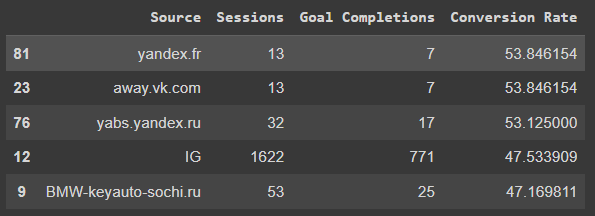

Эти источники показывают высокую эффективность при хорошем объеме трафика. Что делает их наиболее привлекательными для маркетинговых вложений.

## *? Ответьте на вопрос: каких показателей не хватает, чтобы посчитать чистую прибыль?*


**Себестоимость проданных товаров (СПТ)**:*Это прямые затраты на производство или покупку проданных товаров. Для
автомобилей это могут быть затраты на закупку, производство, транспортировку и хранение автомобилей.*

**Операционные расходы**: *Включают административные затраты, расходы на заработную плату, аренду, коммунальные услуги и другие повседневные расходы, необходимые для поддержания деятельности компании.*

**Налоги**: *Суммы, которые компания должна уплатить государству из своих доходов. Включает налог на прибыль и возможно другие налоги и сборы в зависимости от юрисдикции.*

**Амортизация и износ**: *Расходы на амортизацию основных средств и возможно другие постоянные активы.*

**Данные о возвратах и отменах продаж**: *Это снижает общий доход от продаж и должно быть учтено при расчёте чистой прибыли.*

## *? Сделать прогноз до конца февраля по количеству конверсий на каждый день*


In [ ]:
import pandas as pd

# Убедимся, что столбец 'Date' в правильном формате даты
marketing['Date'] = pd.to_datetime(marketing['Date'], errors='coerce')

# Группировка данных по дате и подсчёт количества конверсий
daily_conversions = marketing.groupby('Date')['Конверсия'].sum().reset_index()

# Проверка подготовленных данных
print(daily_conversions.head())


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(daily_conversions['Date'], daily_conversions['Конверсия'], marker='o')
plt.title('Daily Conversions')
plt.xlabel('Date')
plt.ylabel('Number of Conversions')
plt.grid(True)
plt.show()


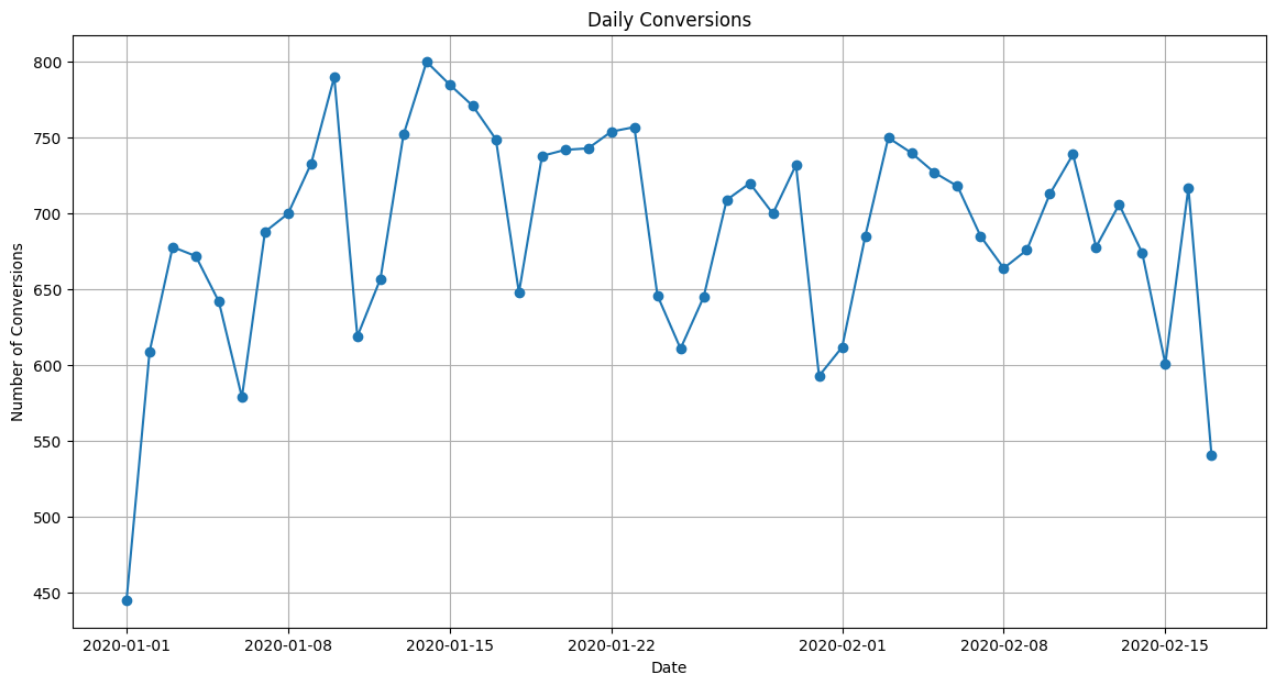

Так как период мал, и нельзя отследить сезонность и тренды в качестве модели прогнозирования берем ARIMA.

In [116]:
# Подготовка данных для обучения модели ARIMA

# Переиндексация данных с установкой дневной частоты ('D')
marketing.index = pd.DatetimeIndex(marketing.index).to_period('D')

# Сортировка индекса, чтобы убедиться, что он монотонный
marketing = marketing.sort_index()


In [ ]:
# Установка и импорт автоподбора параметров для модели ARIMA
!pip install pmdarima
from pmdarima import auto_arima

In [ ]:
# Подбор лучших параметров для модели

auto_model = auto_arima(marketing['Конверсия'], seasonal=False, trace=True)

print(auto_model.summary())

In [127]:
# Получаем лучшие параметры модели
best_order = auto_model.order

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Инициализация и обучение модели ARIMA
model = ARIMA(marketing.groupby('Date')['Конверсия'].sum(), order=best_order)
model_fit = model.fit()

# Вычисляем количество дней до конца февраля
last_known_date = pd.Timestamp('2020-02-17')
days_to_end_of_february = (pd.Timestamp('2020-02-29') - last_known_date).days

# Создаем диапазон дат для прогноза
forecast_dates = pd.date_range(start=last_known_date + pd.Timedelta(days=1), periods=days_to_end_of_february, freq='D')

# Прогнозирование
forecast = model_fit.forecast(steps=days_to_end_of_february)

# Создание DataFrame для прогноза
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': forecast})

print(forecast_df)


###### Прогноз конверсий по дням до конца февраля

Дата-----------------------------Прогноз\
2020-02-18 ------------------ 606.552254\
2020-02-19 ------------------ 662.375919\
2020-02-20 ------------------ 624.305510\
2020-02-21 ------------------ 688.522241\
2020-02-22 ------------------ 641.313372\
2020-02-23 ------------------ 625.006536\
2020-02-24 ------------------ 654.130753\
2020-02-25 ------------------ 639.321590\
2020-02-26 ------------------ 665.244321\
2020-02-27 ------------------ 665.450639\
2020-02-28 ------------------ 650.033608\
2020-02-29 ------------------ 658.269545

## *? Какая будет выручка за первый квартал, если средняя стоимость авто останется неизменной, а продажи будут пропорциональны текущим данным?*


In [ ]:
total_sales_last_year = successful_sales_count  # Общее количество продаж за последний год - 4086 (Данные из ячеек выше)
average_car_price = average_price_rub   # Средняя стоимость автомобиля - 2116851.3837578585 (Данные из ячеек выше)

# Оценка продаж за первый квартал
estimated_sales_q1 = total_sales_last_year / 4

# Расчет ожидаемой выручки за первый квартал
expected_revenue_q1 = estimated_sales_q1 * average_car_price

print(f"Ожидаемая выручка за первый квартал: {expected_revenue_q1:,} рублей.")

# Вывод: Ожидаемая выручка за первый квартал: 2,162,363,688.5086527 рублей.


###### Ожидаемая выручка за первый квартал: *2,162,363,688.5086527 рублей.*